## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.671428 -0.167333  1.079342 -0.284906  0.182619  0.585255
1 -0.005137 -1.230040 -0.783654  1.197888 -0.409120 -0.121560
2 -1.700800  0.031953 -0.015566 -0.266584  0.680060 -1.144941
3  1.237422  1.390421 -1.052159  0.389044 -1.504713 -0.176825
4  0.075750 -0.377796 -0.846574  1.293889  0.198011  0.978884


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0229187	total: 68.8ms	remaining: 1m 8s
1:	learn: 1.0139518	total: 69.5ms	remaining: 34.7s
2:	learn: 1.0020126	total: 70.1ms	remaining: 23.3s
3:	learn: 0.9901672	total: 70.7ms	remaining: 17.6s
4:	learn: 0.9795701	total: 71.3ms	remaining: 14.2s
5:	learn: 0.9690863	total: 71.9ms	remaining: 11.9s
6:	learn: 0.9580716	total: 72.5ms	remaining: 10.3s
7:	learn: 0.9475758	total: 73ms	remaining: 9.05s
8:	learn: 0.9391128	total: 73.6ms	remaining: 8.11s
9:	learn: 0.9290377	total: 74.1ms	remaining: 7.34s
10:	learn: 0.9178010	total: 74.7ms	remaining: 6.72s
11:	learn: 0.9084386	total: 75.2ms	remaining: 6.19s
12:	learn: 0.8993296	total: 75.6ms	remaining: 5.74s
13:	learn: 0.8907550	total: 76.1ms	remaining: 5.36s
14:	learn: 0.8846672	total: 76.7ms	remaining: 5.03s
15:	learn: 0.8758957	total: 77.1ms	remaining: 4.74s
16:	learn: 0.8665777	total: 77.7ms	remaining: 4.49s
17:	learn: 0.8587261	total: 78.3ms	remaining: 4.27s
18:	learn: 0.8499524	total: 78.8ms	remaining: 

83:	learn: 0.4773340	total: 109ms	remaining: 1.19s
84:	learn: 0.4736668	total: 110ms	remaining: 1.18s
85:	learn: 0.4705992	total: 110ms	remaining: 1.17s
86:	learn: 0.4662745	total: 110ms	remaining: 1.16s
87:	learn: 0.4626899	total: 111ms	remaining: 1.15s
88:	learn: 0.4594566	total: 111ms	remaining: 1.14s
89:	learn: 0.4554257	total: 112ms	remaining: 1.13s
90:	learn: 0.4518576	total: 112ms	remaining: 1.12s
91:	learn: 0.4480863	total: 113ms	remaining: 1.11s
92:	learn: 0.4445074	total: 113ms	remaining: 1.1s
93:	learn: 0.4406222	total: 114ms	remaining: 1.09s
94:	learn: 0.4375903	total: 114ms	remaining: 1.09s
95:	learn: 0.4341135	total: 115ms	remaining: 1.08s
96:	learn: 0.4306705	total: 115ms	remaining: 1.07s
97:	learn: 0.4268375	total: 116ms	remaining: 1.06s
98:	learn: 0.4231541	total: 116ms	remaining: 1.06s
99:	learn: 0.4196559	total: 117ms	remaining: 1.05s
100:	learn: 0.4173469	total: 117ms	remaining: 1.04s
101:	learn: 0.4142462	total: 118ms	remaining: 1.04s
102:	learn: 0.4112130	total: 1

251:	learn: 0.1605509	total: 188ms	remaining: 557ms
252:	learn: 0.1593425	total: 188ms	remaining: 556ms
253:	learn: 0.1588134	total: 189ms	remaining: 554ms
254:	learn: 0.1579808	total: 189ms	remaining: 552ms
255:	learn: 0.1571117	total: 190ms	remaining: 551ms
256:	learn: 0.1565015	total: 190ms	remaining: 549ms
257:	learn: 0.1556863	total: 190ms	remaining: 548ms
258:	learn: 0.1551598	total: 191ms	remaining: 547ms
259:	learn: 0.1546430	total: 192ms	remaining: 545ms
260:	learn: 0.1539642	total: 192ms	remaining: 544ms
261:	learn: 0.1535224	total: 193ms	remaining: 542ms
262:	learn: 0.1527539	total: 193ms	remaining: 541ms
263:	learn: 0.1521770	total: 194ms	remaining: 540ms
264:	learn: 0.1514553	total: 194ms	remaining: 538ms
265:	learn: 0.1507090	total: 195ms	remaining: 537ms
266:	learn: 0.1499830	total: 195ms	remaining: 535ms
267:	learn: 0.1494848	total: 195ms	remaining: 534ms
268:	learn: 0.1489671	total: 196ms	remaining: 533ms
269:	learn: 0.1480352	total: 197ms	remaining: 532ms
270:	learn: 

468:	learn: 0.0572763	total: 292ms	remaining: 331ms
469:	learn: 0.0568963	total: 293ms	remaining: 330ms
470:	learn: 0.0565860	total: 293ms	remaining: 329ms
471:	learn: 0.0562828	total: 294ms	remaining: 329ms
472:	learn: 0.0560419	total: 294ms	remaining: 328ms
473:	learn: 0.0557825	total: 295ms	remaining: 327ms
474:	learn: 0.0554178	total: 295ms	remaining: 326ms
475:	learn: 0.0553475	total: 295ms	remaining: 325ms
476:	learn: 0.0551149	total: 296ms	remaining: 324ms
477:	learn: 0.0548559	total: 296ms	remaining: 324ms
478:	learn: 0.0546030	total: 297ms	remaining: 323ms
479:	learn: 0.0542480	total: 297ms	remaining: 322ms
480:	learn: 0.0538998	total: 298ms	remaining: 321ms
481:	learn: 0.0538326	total: 298ms	remaining: 320ms
482:	learn: 0.0535744	total: 298ms	remaining: 319ms
483:	learn: 0.0532333	total: 299ms	remaining: 319ms
484:	learn: 0.0531770	total: 299ms	remaining: 318ms
485:	learn: 0.0529253	total: 300ms	remaining: 317ms
486:	learn: 0.0525910	total: 300ms	remaining: 316ms
487:	learn: 

635:	learn: 0.0269739	total: 371ms	remaining: 212ms
636:	learn: 0.0269361	total: 371ms	remaining: 212ms
637:	learn: 0.0268330	total: 372ms	remaining: 211ms
638:	learn: 0.0266827	total: 372ms	remaining: 210ms
639:	learn: 0.0266020	total: 374ms	remaining: 210ms
640:	learn: 0.0265318	total: 374ms	remaining: 210ms
641:	learn: 0.0264143	total: 375ms	remaining: 209ms
642:	learn: 0.0262678	total: 375ms	remaining: 208ms
643:	learn: 0.0262318	total: 375ms	remaining: 207ms
644:	learn: 0.0261963	total: 376ms	remaining: 207ms
645:	learn: 0.0261282	total: 376ms	remaining: 206ms
646:	learn: 0.0259944	total: 377ms	remaining: 205ms
647:	learn: 0.0258524	total: 377ms	remaining: 205ms
648:	learn: 0.0257765	total: 377ms	remaining: 204ms
649:	learn: 0.0256245	total: 378ms	remaining: 203ms
650:	learn: 0.0255056	total: 378ms	remaining: 203ms
651:	learn: 0.0254716	total: 379ms	remaining: 202ms
652:	learn: 0.0254379	total: 379ms	remaining: 202ms
653:	learn: 0.0253255	total: 380ms	remaining: 201ms
654:	learn: 

858:	learn: 0.0121764	total: 476ms	remaining: 78.1ms
859:	learn: 0.0121319	total: 476ms	remaining: 77.5ms
860:	learn: 0.0120836	total: 477ms	remaining: 77ms
861:	learn: 0.0120269	total: 477ms	remaining: 76.4ms
862:	learn: 0.0120187	total: 478ms	remaining: 75.8ms
863:	learn: 0.0119511	total: 478ms	remaining: 75.2ms
864:	learn: 0.0119430	total: 479ms	remaining: 74.7ms
865:	learn: 0.0118998	total: 479ms	remaining: 74.1ms
866:	learn: 0.0118699	total: 479ms	remaining: 73.5ms
867:	learn: 0.0118394	total: 480ms	remaining: 73ms
868:	learn: 0.0117869	total: 480ms	remaining: 72.4ms
869:	learn: 0.0117572	total: 481ms	remaining: 71.8ms
870:	learn: 0.0117280	total: 481ms	remaining: 71.3ms
871:	learn: 0.0117081	total: 482ms	remaining: 70.7ms
872:	learn: 0.0116537	total: 482ms	remaining: 70.1ms
873:	learn: 0.0116243	total: 482ms	remaining: 69.5ms
874:	learn: 0.0115492	total: 483ms	remaining: 69ms
875:	learn: 0.0114989	total: 483ms	remaining: 68.4ms
876:	learn: 0.0114345	total: 484ms	remaining: 67.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

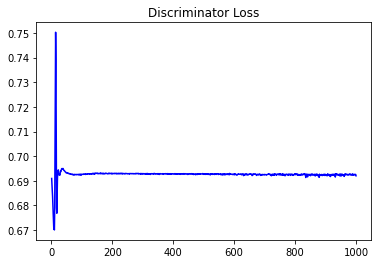

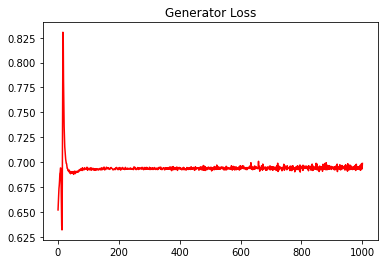

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09609473160911153


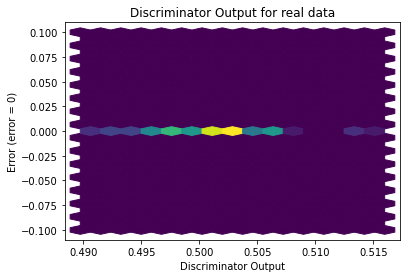

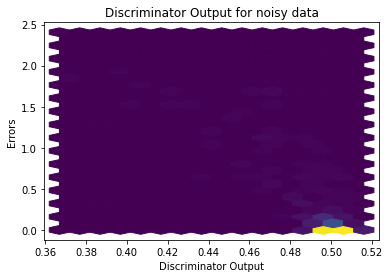

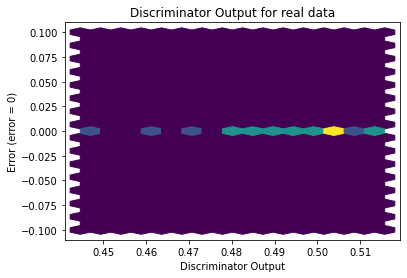

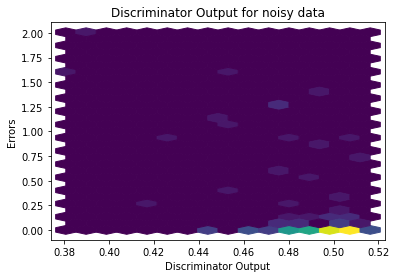

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


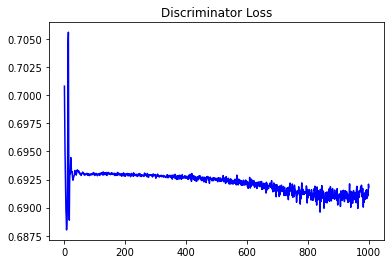

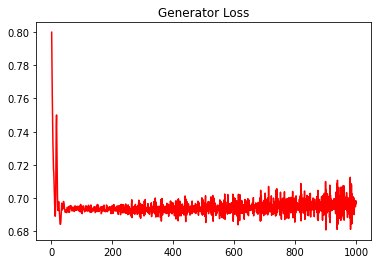

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08386073005804844


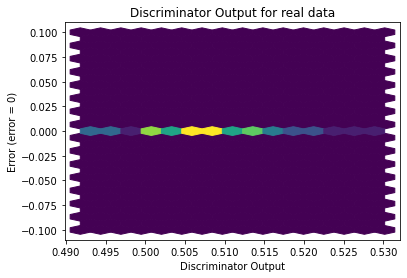

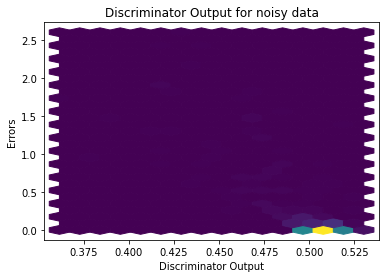

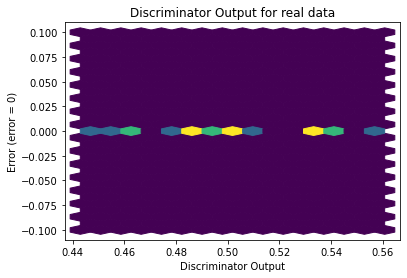

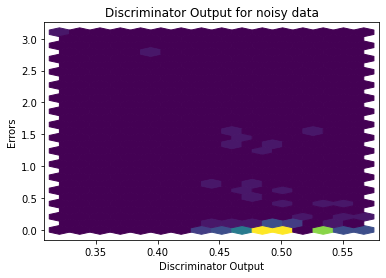

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4184]], requires_grad=True)
